In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

%matplotlib inline
pd.options.mode.chained_assignment = None

In [2]:
import datetime

In [3]:
def get_day(y, m, d):
    y, m, d = map(int, [y, m, d])
    today = datetime.datetime(y, m, d)
    return today.weekday()

def parse_time_stamp(timestamp):
    timestamp = timestamp.split()
    date = timestamp[0].split('/')
    time = timestamp[1].split(':')
    return date[0], date[1], date[2], time[0], time[1]

In [4]:
raw = pd.read_csv('data.csv')
raw = raw.fillna(0)
raw.loc[raw.type=='RE', 'amount'] = - raw.loc[raw.type=='RE']['amount']
raw = raw.drop('type', axis=1)

In [5]:
raw = raw[:58169]

In [6]:
get_day(2017, 1, 1)

6

In [10]:
day_sum = 0
starty, startm, startd = map(str, [2017, 1, 1])
with open('pdata.csv', 'w+') as f:
    for index, row in raw.iterrows():
        y, m, d, h, _ = parse_time_stamp(row['time'])
        if (y, m, d) == (starty, startm, startd):
            if int(h) < 10:
                day_sum += row['amount']
        else:
            day_name = get_day(starty, startm, startd)
            f.write(",".join(map(str, [day_name, startd, np.int(day_sum)])) + "\n")
            day_sum = row['amount']
            starty, startm, startd = y, m, d
            

In [11]:
day_sum = 0
starty, startm, startd = map(str, [2017, 1, 1])
with open('target.csv', 'w+') as f:
    for index, row in raw.iterrows():
        y, m, d, h, _ = parse_time_stamp(row['time'])
        if (y, m, d) == (starty, startm, startd):
            day_sum += row['amount']
        else:
            f.write(str(np.int(day_sum)) + "\n")
            day_sum = row['amount']
            starty, startm, startd = y, m, d

In [12]:
data = np.genfromtxt('pdata.csv', delimiter=',')
target = np.genfromtxt('target.csv')

In [15]:
print(data.shape)
print(target.shape)

(203, 3)
(203,)


In [74]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.1, random_state=0)
#X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=0)

In [75]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
from sklearn.svm import SVR

from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import make_scorer, r2_score


In [ ]:
def fit_model(X, y):
    cross_validator = KFold(4)
    regressor = SVR()
    params = {
        "C": [1, 2, 3, 4],
        "kernel": ['rbf', 'poly']
    }
    scoring_func = make_scorer(r2_score, greater_is_better=True)
    grid = GridSearchCV(
        estimator=regressor,  
        param_grid=params, 
        scoring=scoring_func, 
        cv=cross_validator
    )

    grid = grid.fit(X, y)

    return grid.best_estimator_

optimal_reg = fit_model(X_train, y_train)

y_pred = optimal_reg.predict(X_valid)

In [ ]:
def show_reg(iy1, iy2):
    plt.figure(figsize=(20, 10))
    ix = range(len(iy1))
    plt.plot(ix, iy1, label='true')
    plt.plot(ix, iy2, label='predict')
    plt.legend()
    plt.show()

In [ ]:
show_reg(y_valid, y_pred)

In [40]:
clf = GradientBoostingRegressor(
    loss='huber',
    n_estimators=2000, max_depth=15,
    learning_rate=.1
)

clf.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=15,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=2000,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [41]:
y_pred = clf.predict(X_valid)

In [42]:
mse = metrics.mean_squared_error(y_pred, y_valid)
r2 = metrics.r2_score(y_pred, y_valid)

In [43]:
mse

3301130641.8642888

In [44]:
r2

-0.44273213751291074

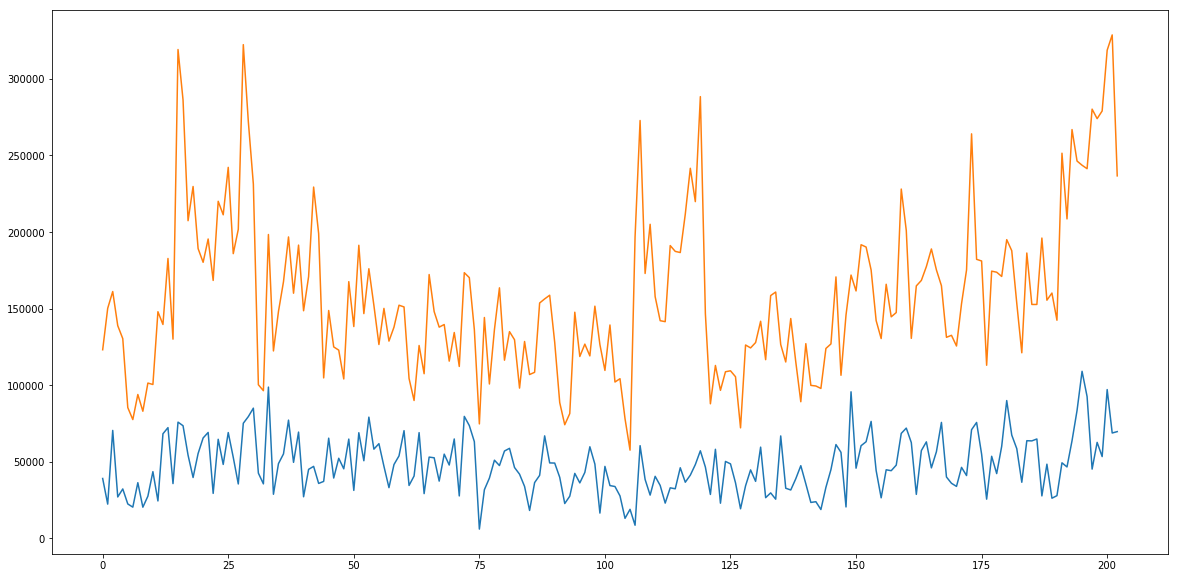

In [47]:
iy1 = data[:,2]
iy2 = np.squeeze(target)
ix = range(len(data))

plt.figure(figsize=(20, 10))
plt.plot(ix, iy1)
plt.plot(ix, iy2)
plt.show()

In [48]:
from sklearn.ensemble import AdaBoostRegressor

In [59]:
adareg =AdaBoostRegressor(
    learning_rate=.3,
    n_estimators=3000, random_state=0
    )

adareg.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=0.3, loss='linear',
         n_estimators=3000, random_state=0)

In [52]:
ar2 = metrics.r2_score(y_valid, adareg.predict(X_valid))

In [53]:
ar2

-0.60846210116117971

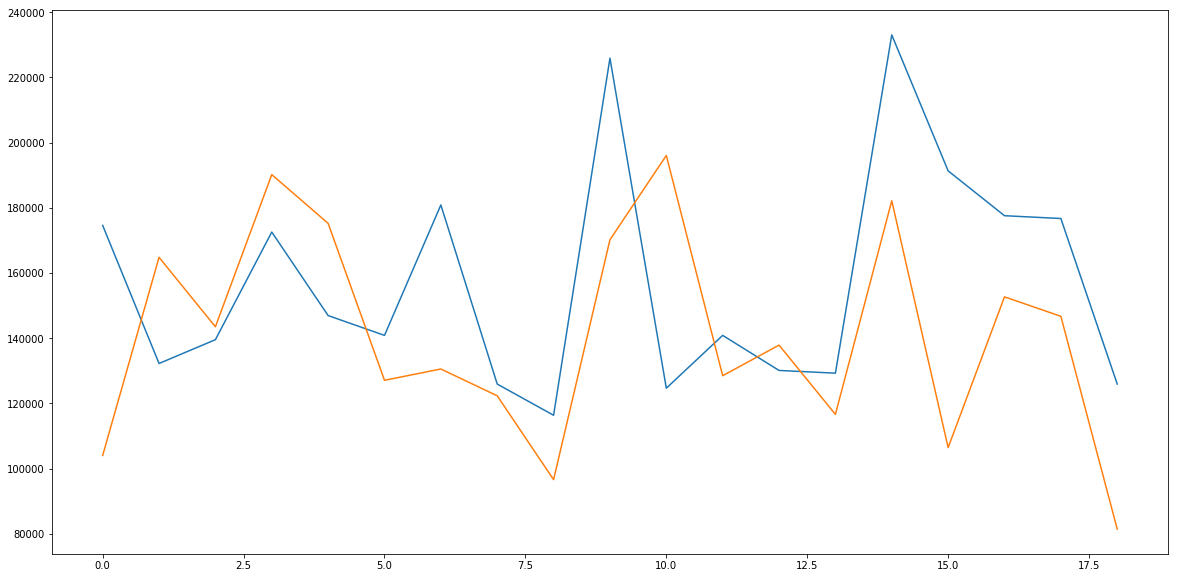

In [60]:
iy1 = adareg.predict(X_valid)
iy2 = y_valid
ix = range(len(X_valid))

plt.figure(figsize=(20, 10))
plt.plot(ix, iy1)
plt.plot(ix, iy2)
plt.show()

In [ ]:
from 